Clearly most of the changes are happening within a sentence. Eventually we will have to check if multiple sentences are being added even though it;s a single sentence. But if the modified thing is within a single sentence, we can do a mapping.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

ACCEPT_STRINGS = [
"Accept (Oral)",
"Accept (Poster)"]
REJECT_STRINGS = [
"Reject",
"Invite to Workshop Track",
]
ACCEPT_MAP = {k:"accept" for k in ACCEPT_STRINGS}
ACCEPT_MAP.update({k:"reject" for k in REJECT_STRINGS})

df = pd.read_csv('latmod_counts.csv')
df['avg_score'] = df['review_scores'].apply(lambda x: None if x == "[]" else sum(eval(x)) / len(eval(x)))
df['clean_status'] = [None] * len(df)
df['clean_decision'] = [None] * len(df)

status_map = {}
for r in df.to_dict(orient="records"):
    overall_status = None
    if r['download_status'] == 'complete':
        if r['extract_status'] in ['complete', 'no_change']:
            if r['abstract_status'] == 'complete' or r['intro_status'] == 'complete':
                overall_status = 'complete'
            else:
                overall_status = 'no_revision'
        else:
            assert r['extract_status'] == 'error'
            overall_status = 'extract_error'
    else:
        overall_status = r['download_status'] 
    assert overall_status is not None
    status_map[r['forum_id']] = (overall_status, ACCEPT_MAP.get(r['decision'], None))
    


df.set_index('forum_id', inplace=True)
for forum_id, (status, decision) in status_map.items():
    df.loc[forum_id, 'clean_status'] = status
    df.loc[forum_id, 'clean_decision'] = decision


# Figure 1

Figure 1 shows that:
* 

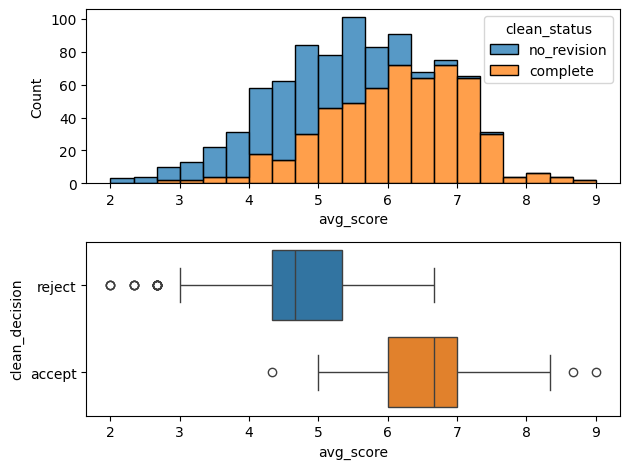

In [2]:
fig_1_df = df.filter(items=['clean_status', 'avg_score', 'clean_decision']).query('clean_status == "no_revision" or clean_status == "complete"')
fig, axs = plt.subplots(2, 1)
sns.histplot(hue=fig_1_df['clean_status'], x=fig_1_df['avg_score'], multiple='stack', ax=axs[0])
sns.boxplot(y=fig_1_df['clean_decision'], x=fig_1_df['avg_score'], hue=fig_1_df['clean_decision'], ax=axs[1])
plt.tight_layout()

In [3]:
fig_1_df

,clean_status,avg_score,clean_decision
forum_id,,,
ryzm6BATZ,no_revision,5.333333,reject
ryykVe-0W,complete,4.666667,reject
rywHCPkAW,complete,6.000000,accept
rywDjg-RW,complete,6.666667,accept
ryvxcPeAb,no_revision,4.666667,reject
...,...,...,...
B14uJzW0b,no_revision,5.333333,reject
B14TlG-RW,complete,6.333333,accept
B13njo1R-,complete,6.333333,accept


In [4]:
df["status_decision"] = df['clean_status'] + "|" + df['clean_decision']

In [5]:
df['status_decision'].value_counts()

status_decision
no_revision|reject      345
complete|accept         321
complete|reject         224
extract_error|reject     14
extract_error|accept     11
no_revision|accept        5
no_pdf|reject             2
Name: count, dtype: int64

In [15]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
print("blerp")
df = px.data.tips()
fig = px.parallel_categories(fig_1_df, dimensions=['clean_decision', 'clean_status'],
                color="avg_score",
                             color_continuous_scale=px.colors.sequential.Inferno,
                labels={'clean_status':'Status', 'clean_decision':'Decision'})
fig.show()

blerp
